In [272]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df=pd.read_csv("Reel Performance/viral reels.csv")
df.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,09-02-24
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,17-04-24
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,01-01-24
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,01-04-24
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,15-01-24


In [274]:
df.shape

(400, 10)

In [275]:
df.columns

Index(['video_id', 'duration_sec', 'hook_strength_score', 'niche',
       'views_first_hour', 'views_total', 'retention_rate',
       'first_3_sec_engagement', 'music_type', 'upload_time'],
      dtype='object')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                400 non-null    object 
 1   duration_sec            400 non-null    int64  
 2   hook_strength_score     400 non-null    float64
 3   niche                   400 non-null    object 
 4   views_first_hour        400 non-null    int64  
 5   views_total             400 non-null    int64  
 6   retention_rate          400 non-null    float64
 7   first_3_sec_engagement  400 non-null    float64
 8   music_type              400 non-null    object 
 9   upload_time             400 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 31.4+ KB


In [277]:
df.describe()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,25.085000,0.584850,24730.51000,486338.497500,0.528275,0.617800
std,11.649552,0.229429,14180.99207,291672.505188,0.245214,0.230906
min,5.000000,0.200000,84.00000,1924.000000,0.100000,0.200000
25%,15.000000,0.390000,12497.00000,227904.500000,0.310000,0.420000
50%,26.000000,0.590000,24984.00000,473516.000000,0.530000,0.635000
75%,35.000000,0.770000,36222.25000,745058.750000,0.740000,0.820000
max,44.000000,1.000000,49812.00000,992963.000000,0.950000,0.990000


In [278]:
#missing values
df.isnull().sum()

video_id                  0
duration_sec              0
hook_strength_score       0
niche                     0
views_first_hour          0
views_total               0
retention_rate            0
first_3_sec_engagement    0
music_type                0
upload_time               0
dtype: int64

In [279]:
df.duplicated().sum()

np.int64(0)

In [280]:
median_views=df['views_total'].median()
print(median_views)


473516.0


In [281]:
df['viral']=(df['views_total'] > median_views).astype(int)

In [282]:
df = df.drop(columns=[
    "video_id",
    "views_first_hour",
    "views_total",
    "retention_rate",
    "first_3_sec_engagement",
    "upload_time"
])


In [283]:
df['niche'].unique().tolist()


['Motivation',
 'Tech',
 'Travel',
 'Gaming',
 'Music',
 'Education',
 'Fitness',
 'Comedy',
 'Food',
 'Beauty']

In [284]:
df['duration_sec'].unique()

array([16, 19, 13, 36,  8, 39, 42, 37, 32, 35, 20, 38, 15, 28, 17, 11, 27,
       44, 43, 41, 34, 12, 31, 10, 22, 21, 30,  5, 33, 40, 24, 26, 14, 18,
        7, 29, 23,  6, 25,  9])

In [285]:
df['music_type'].unique().tolist()

['Viral Track', 'Trending', 'Remix', 'Original', 'No Music']

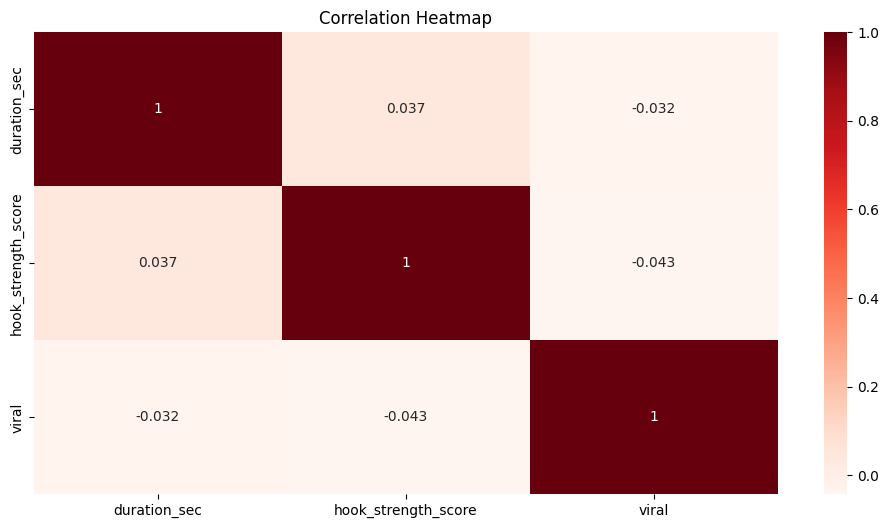

In [286]:
#correlation heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

In [287]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [288]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


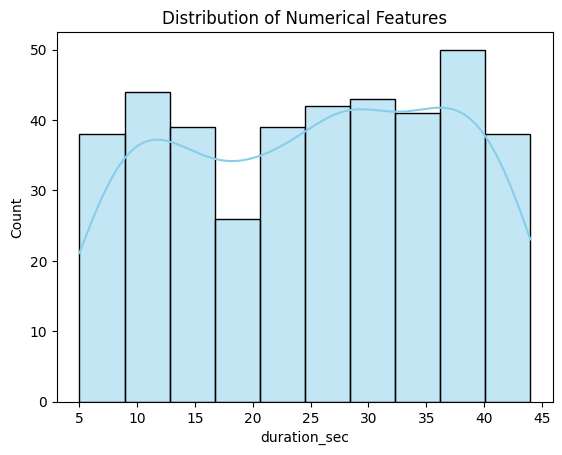

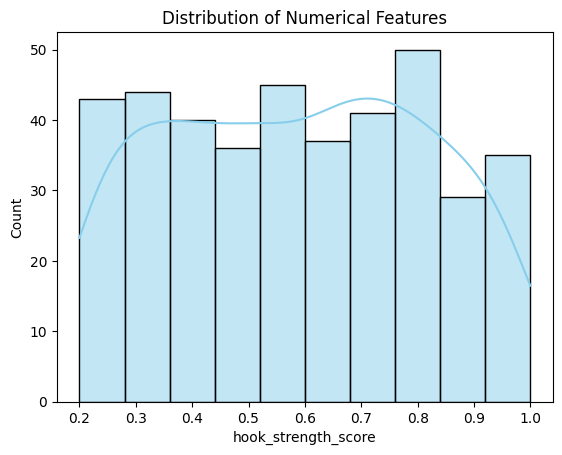

KeyError: 'views_first_hour'

<Figure size 640x480 with 0 Axes>

In [289]:
#Distribution of Numerical Features

numeric_cols=['duration_sec', 'hook_strength_score',
       'views_first_hour', 'views_total', 'retention_rate',
       'first_3_sec_engagement']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col],kde=True,color='skyblue')
    plt.title(f"Distribution of Numerical Features")
    plt.show()

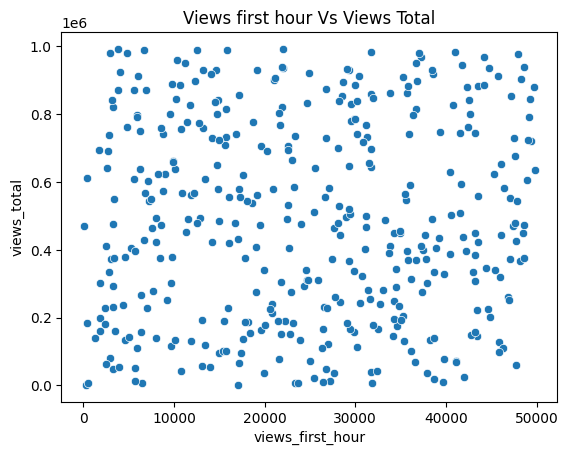

In [ ]:
#how first hours can get more views? view first hours Vs total views

plt.figure()
sns.scatterplot(data=df, x='views_first_hour',y='views_total')
plt.title('Views first hour Vs Views Total')
plt.show()

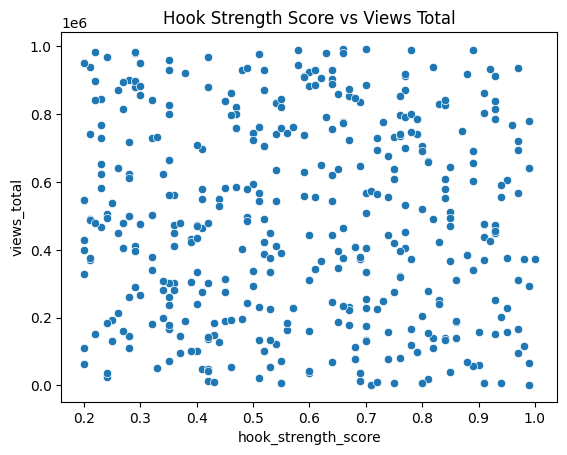

In [ ]:
# Hook Strength vs Views Total

plt.figure()
sns.scatterplot(data=df, x='hook_strength_score', y='views_total')
plt.title("Hook Strength Score vs Views Total")
plt.show()

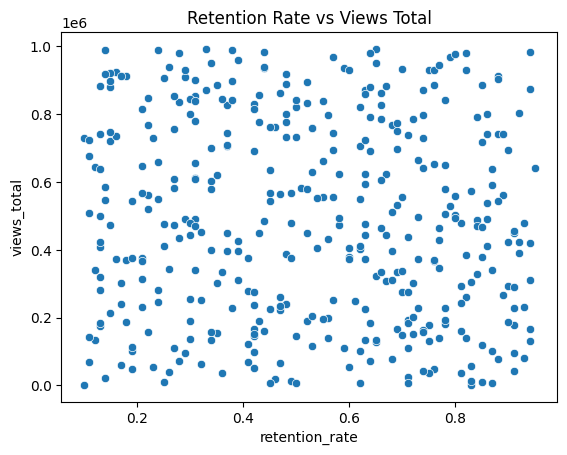

In [ ]:
# Retention vs Views Total

plt.figure()
sns.scatterplot(data=df, x='retention_rate', y='views_total')
plt.title("Retention Rate vs Views Total")
plt.show()

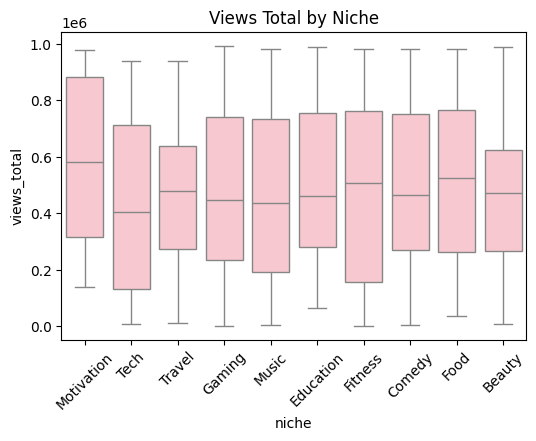

In [ ]:
# Niche vs Views

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='niche', y='views_total', color="pink")
plt.xticks(rotation=45)
plt.title("Views Total by Niche")
plt.show()

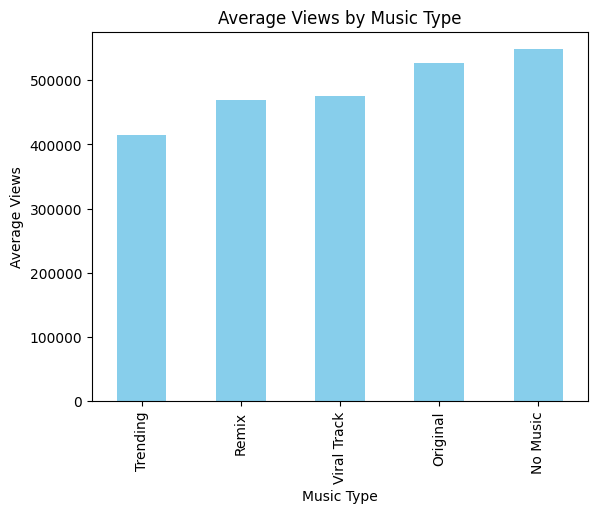

In [ ]:
#Average Views by Music Type

plt.figure()
df.groupby('music_type')['views_total'].mean().sort_values().plot(kind='bar', color="skyblue")
plt.title("Average Views by Music Type")
plt.xlabel("Music Type")
plt.ylabel("Average Views")
plt.show()


In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [301]:
numeric_cols=["duration_sec","hook_strength_score"]
categorical_cols=["niche","music_type"]

In [302]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [303]:
print(df.columns.tolist())


['duration_sec', 'hook_strength_score', 'viral', 'niche_Comedy', 'niche_Education', 'niche_Fitness', 'niche_Food', 'niche_Gaming', 'niche_Motivation', 'niche_Music', 'niche_Tech', 'niche_Travel', 'music_type_Original', 'music_type_Remix', 'music_type_Trending', 'music_type_Viral Track']


In [304]:
scaler=StandardScaler()
x_numeric=scaler.fit_transform(x[numeric_cols])

In [305]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
x_cat = ohe.fit_transform(x[categorical_cols]) 


In [306]:
import numpy as np
x_final=np.concatenate([x_numeric,x_cat],axis=1)
x_final.shape

(400, 17)

In [307]:
y=df['viral']

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42, shuffle=True)

In [309]:
#Logistic Regression model training

log=LogisticRegression()
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [310]:
train_result=log.predict(x_train)
test_result=log.predict(x_test)
test_probability=log.predict_proba(x_test)[:,1]

In [311]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [312]:
print("Training results:", accuracy_score(train_result, y_train) * 100, '%')
print("Testing results:", accuracy_score(test_result, y_test) * 100, '%')

Training results: 57.8125 %
Testing results: 51.24999999999999 %


In [313]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_final)



In [297]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [298]:
log_pca=LogisticRegression()
log_pca.fit(x_train_pca,y_train_pca)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [299]:
train_result_pca=log_pca.predict(x_train_pca)
test_result_pca=log_pca.predict(x_test_pca)
test_probability_pca=log_pca.predict_proba(x_test_pca)[:,1]

In [314]:
print("Traing result pca:",precision_score(train_result_pca,y_train_pca)*100,'%')
print("Testing result pca:",precision_score(test_result_pca,y_test_pca)*100,'%')

Traing result pca: 47.5 %
Testing result pca: 45.0 %


In [323]:
from sklearn.metrics import f1_score
proba_pca = log_pca.predict_proba(x_test_pca)[:, 1]
pred_labels = (proba_pca >= 0.5).astype(int)

print("F1:", f1_score(y_test_pca, pred_labels, zero_division=0))


F1: 0.4444444444444444


In [324]:
#Saving Pickle file

import pickle

model_package = {
    "model": log,
    "scaler": scaler,
    "ohe": ohe,
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols
}

with open("viral_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Model saved as viral_model.pkl")


Model saved as viral_model.pkl
